In [1]:
# importing required modules
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

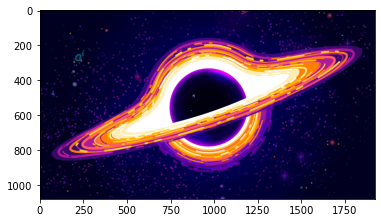

In [2]:
# reading and showing the image
img1 = cv.imread('gargantua.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
plt.imshow(img1)

In [3]:
# applying blur or average blur to image
img_blr = cv.blur(img1,(5,5))
#plt.imshow(img_blr)
#plt.title("Average Blurred Image")

In [4]:
# applying gaussian blur to image
img_gaus_blr = cv.GaussianBlur(img1,(5,5),0)
#plt.imshow(img_gaus_blr)
#plt.title("Gaussian Blurred Image")

In [5]:
# applying median blur to image
img_mdn_blr = cv.medianBlur(img1,5)
#plt.imshow(img_mdn_blr)
#plt.title("Median Blurred Image")

In [6]:
# applying bilateral blur to image
img_blt_blr = cv.bilateralFilter(img1,9, 75,75)
#plt.imshow(img_blt_blr)
#plt.title("Bilateral Blurred Image")

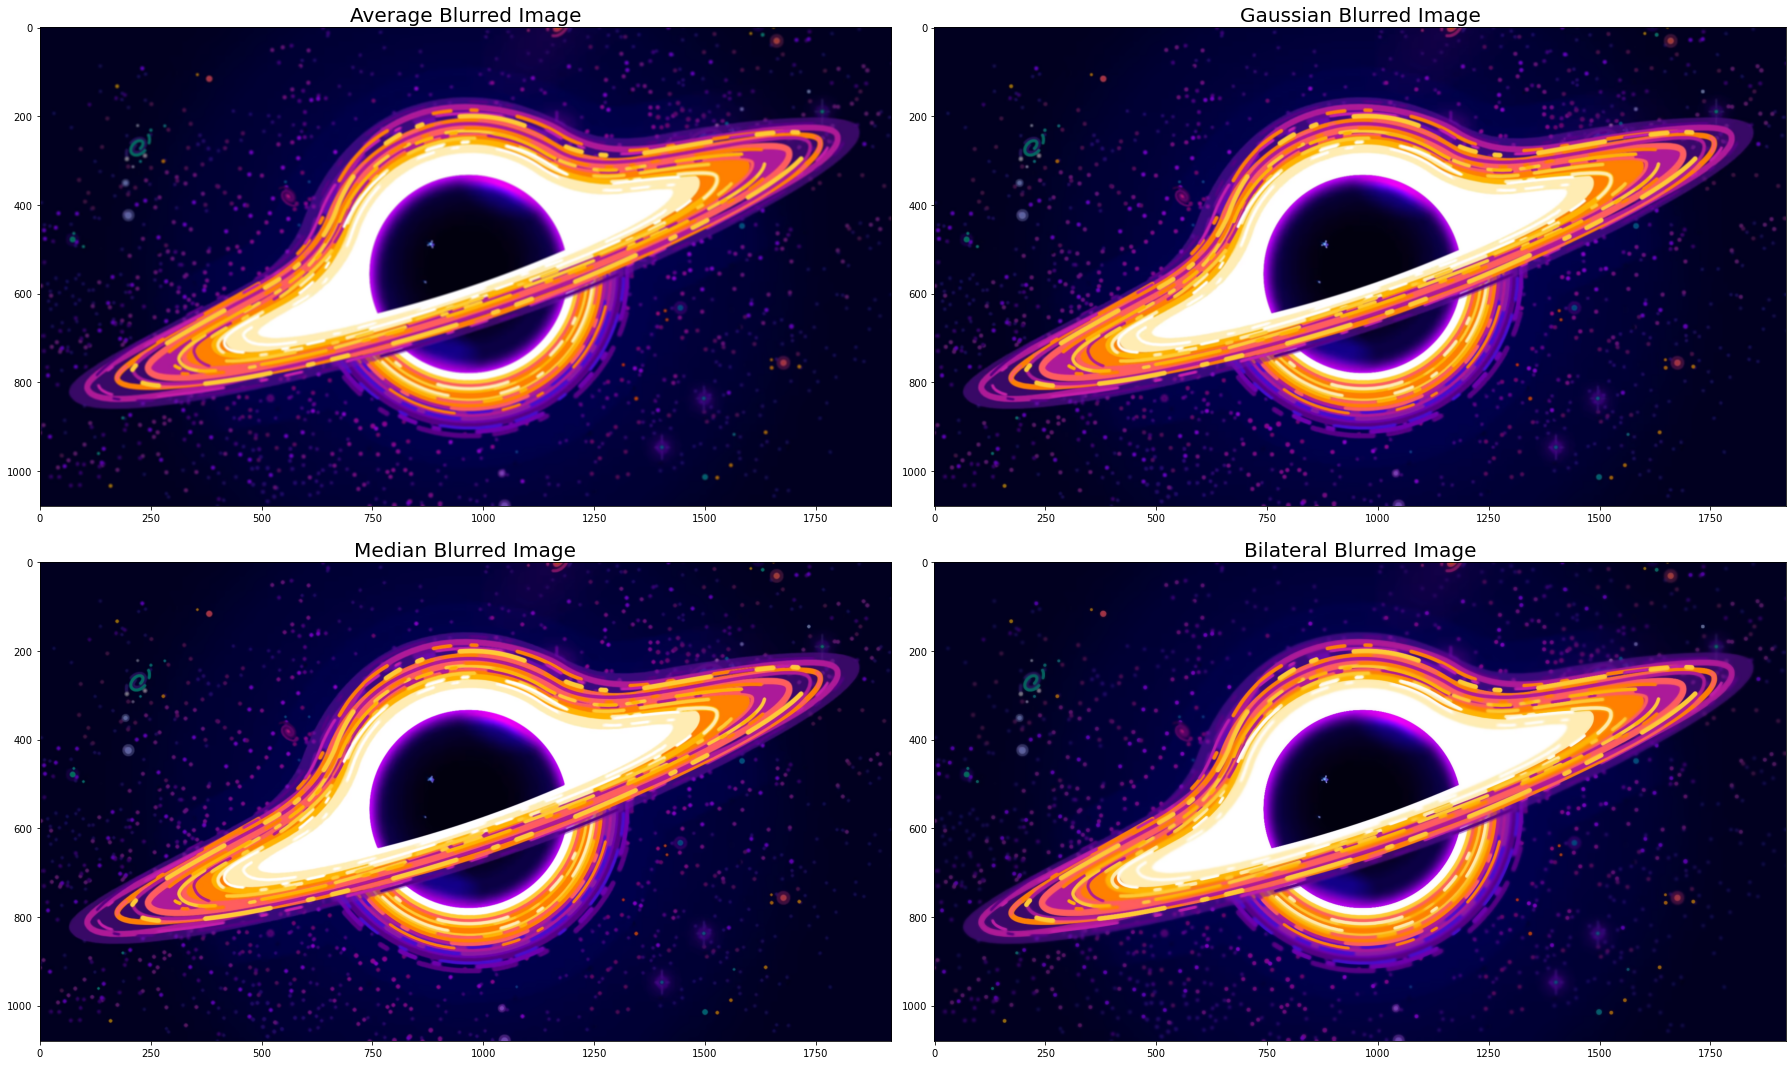

In [7]:
# plotting all the default methods results for comparision
titles = ["Average Blurred Image", "Gaussian Blurred Image", "Median Blurred Image", "Bilateral Blurred Image"]
images = [img_blr, img_gaus_blr, img_mdn_blr, img_blt_blr]
plt.figure(figsize=(25,15))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i], fontsize = 20)
plt.tight_layout()
plt.show()

In [ ]:
#print(img_blr[1000, 900])
#print(img_mdn_blr[1000, 900])
#print(img_gaus_blr[1000, 900])
#print(img_blt_blr[1000, 900])

In [8]:

def cnvltn(image, kernel):
    
    # getting the kernel height and width
    kh, kw = kernel.shape
    
    #checking the kernel, is it in proper square neighborhood
    if (kh == kw):
        
        # getting the image height and width as per convolution
        hgt, wdt = image.shape
        hgt = hgt - kh + 1
        wdt = wdt - kh + 1
    
        # creating a dark image to store the output
        #blk_image = np.zeros((hgt, wdt))
        blk_image = image.copy()
        blk_image[:,:,:] = 0
        
        # iterating through the image dimensions
        for i in range(hgt):
            for j in range(wdt):
                for ch in range(3):
                
                # put back the convolved values to the dark image
                    blk_image[i, j, ch] = np.sum(image[i:i+kh, j:j+kh, ch]*kernel)
                
    return blk_image

In [9]:
def gaus_kernel(filter_size, sigma=1):
    
    # required filter size 
    filter_size = int(filter_size) // 2
    
    # creating a blob with that filter size
    hgt, wdt = np.mgrid[-filter_size:filter_size+1, -filter_size:filter_size+1]
    
    # Using the Gaussian formula for computation
    gaus_const = 1 / (2.0 * np.pi * sigma**2)
    
    gauss =  np.exp(-((hgt**2 + wdt**2) / (2.0*sigma**2))) * gaus_const
    
    return gauss

In [10]:
image = cv.imread('gargantua.png')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
h, w, c = image.shape

avg_kernel = np.ones((5,5))/25
kh, kw = avg_kernel.shape

dark_img = image.copy()
dark_img[:, :, :] = 0

for row in range(h-kh+1):
    for col in range(w-kw+1):
        for ch in range(c):
            dark_img[row, col, ch] = np.sum(image[row:row + kh, col:col + kw, ch] * avg_kernel)

Text(0.5, 1.0, 'custom_avg_blur')

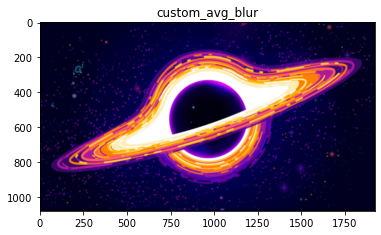

In [11]:
custom_avg_blr = dark_img
plt.imshow(custom_avg_blr)
plt.title('custom_avg_blur')

In [12]:
image = cv.imread('gargantua.png')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
h, w, c = image.shape

avg_kernel = np.ones((5,5))
kh, kw = avg_kernel.shape

dark_img1 = image.copy()
dark_img1[:, :, :] = 0

for row in range(h-kh+1):
    for col in range(w-kw+1):
        for ch in range(c):
            dark_img1[row, col, ch] = np.median(image[row:row + kh, col:col + kw, ch] * avg_kernel)
            
            
            
#plt.imshow(dark_img1)            

Text(0.5, 1.0, 'custom_mdn_blur')

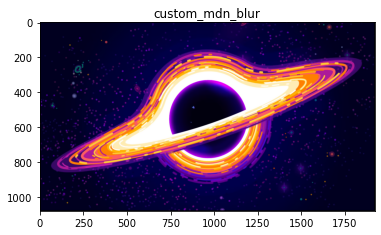

In [13]:
custom_mdn_blr = dark_img1
plt.imshow(custom_mdn_blr)
plt.title('custom_mdn_blur')

In [14]:
image = cv.imread('gargantua.png')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
h, w, c = image.shape

avg_kernel = gaus_kernel(5, sigma = 1)
kh, kw = avg_kernel.shape

dark_img2 = image.copy()
dark_img2[:, :, :] = 0

for row in range(h-kh+1):
    for col in range(w-kw+1):
        for ch in range(c):
            dark_img2[row, col, ch] = np.sum(image[row:row + kh, col:col + kw, ch] * avg_kernel)

Text(0.5, 1.0, 'custom_gaus_blur')

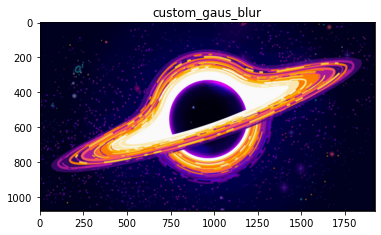

In [15]:
custom_gaus_blr = dark_img2
plt.imshow(custom_gaus_blr)
plt.title('custom_gaus_blur')

In [ ]:
#print(custom_avg_blr[1000, 900])
#print(custom_mdn_blr[1000, 900])
#print(custom_gaus_blr[1000, 900])
#print(img_blt_blr[1000, 900])

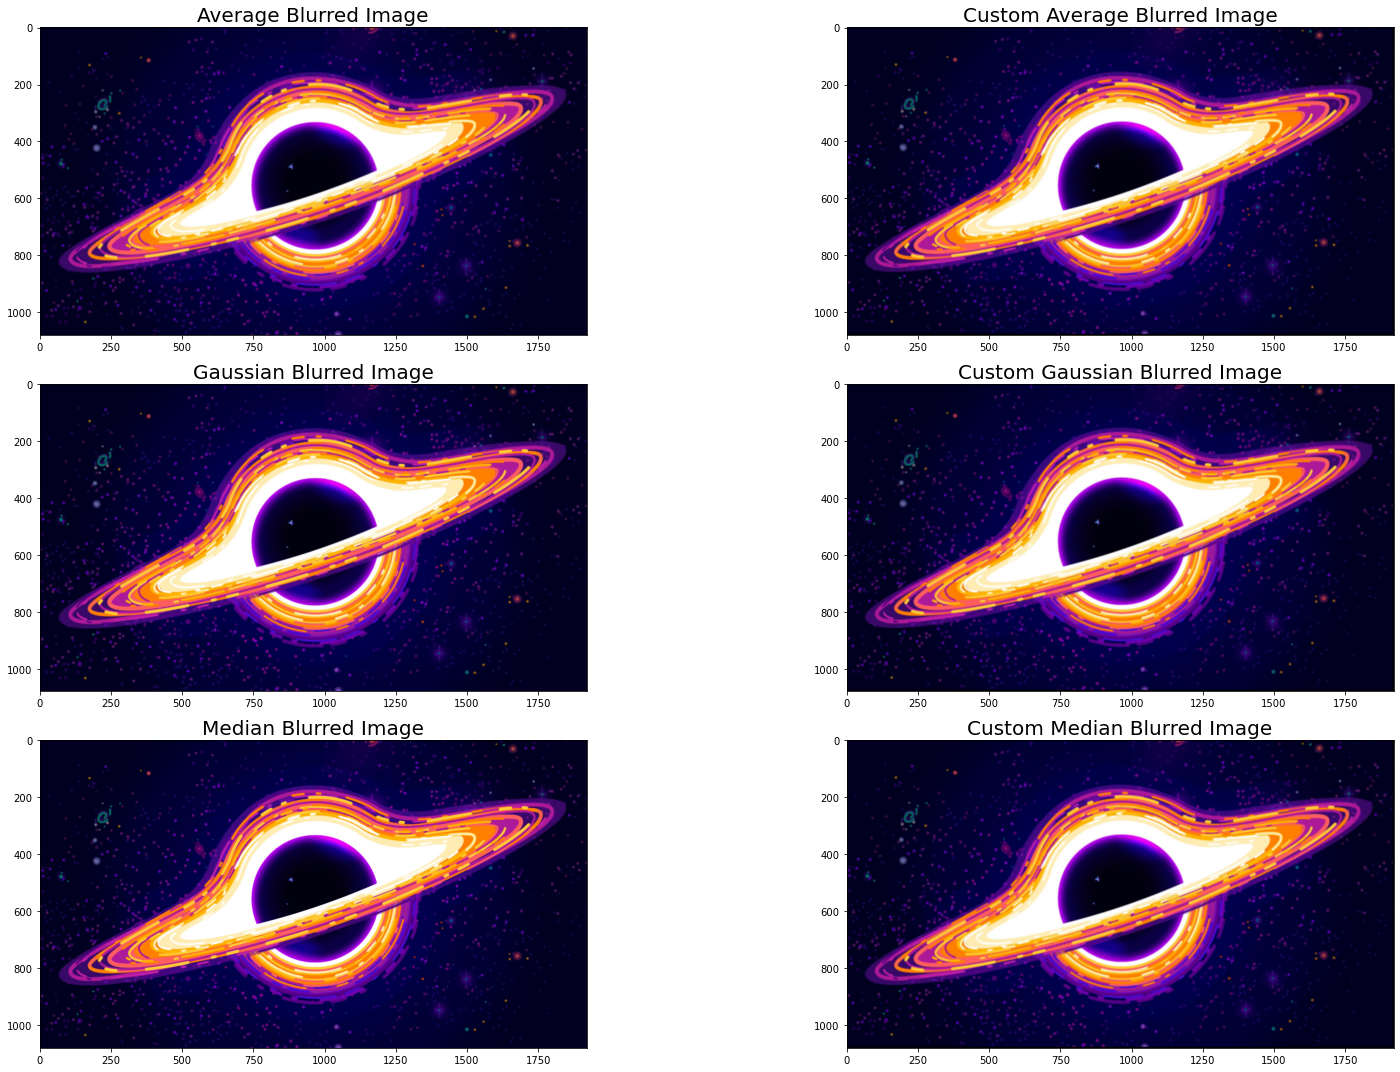

In [16]:
# plotting all the default methods results for comparision
titles = ["Average Blurred Image", "Custom Average Blurred Image", "Gaussian Blurred Image", "Custom Gaussian Blurred Image", "Median Blurred Image", "Custom Median Blurred Image"]
images = [img_blr, custom_avg_blr, img_gaus_blr, custom_avg_blr, img_mdn_blr, custom_avg_blr]
plt.figure(figsize=(25,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i], fontsize = 20)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
  
  def gaussian(im, sigma):
      height, width, _ = im.shape
      img_filtered = np.zeros([height, width, 3])
  
      # Define filter size.
      # A Gaussian has infinite support, but most of it's mass lies within
      # three standard deviations of the mean. The standard deviation is
      # the square of the variance, sigma.
      n = np.int(np.sqrt(sigma) * 3)
  
      # Iterate over pixel locations p
      for p_y in range(height):
          for p_x in range(width):
              gp = 0
              w = 0
  
              # Iterate over kernel locations to define pixel q
              for i in range(-n, n):
                  for j in range(-n, n):
                      # Make sure no index goes out of bounds of the image
                      q_y = np.max([0, np.min([height - 1, p_y + i])])
                      q_x = np.max([0, np.min([width - 1, p_x + j])])
                      # Computer Gaussian filter weight at this filter pixel
                      g = np.exp( -((q_x - p_x)**2 + (q_y - p_y)**2) / (2 * sigma**2) )

                      # Accumulate filtered output
                      gp += g * im[p_y, p_x, :]
                      # Accumulate filter weight for later normalization, to maintain image brightness
                      w += g
              img_filtered[p_y, p_x, :] = gp / (w + np.finfo(np.float32).eps)

      return img_filtered

In [5]:
def gaussian(x,sigma):
    return (1.0/(2*np.pi*(sigma**2)))*np.exp(-(x**2)/(2*(sigma**2)))

def distance(x1,y1,x2,y2):
    return np.sqrt(np.abs((x1-x2)**2-(y1-y2)**2))

def bilateral_filter(image, diameter, sigma_i, sigma_s):
    new_image = np.zeros(image.shape)
    h, w, c = image.shape
    filtered_image = image.copy()
    filtered_image[:, :, :] = 0

    for row in range(h):
        for col in range(w):
            for ch in range(c):
                #wp_total = 0
                
                for k in range(diameter):
                    for l in range(diameter):
                        n_x =row - (diameter/2 - k)
                        n_y =col - (diameter/2 - l)
                        if n_x >= len(image):
                            n_x -= len(image)
                        if n_y >= len(image[0]):
                            n_y -= len(image[0])
                        gi = gaussian(image[int(n_x)][int(n_y)] - image[row][col], sigma_i)
                        gs = gaussian(distance(n_x, n_y, row, col), sigma_s)
                        wp = gi * gs
                        filtered_image = (filtered_image) + (image[int(n_x)][int(n_y)] * wp)
                        #wp_total = wp_total + wp
                #filtered_image = filtered_image // wp_total
                filtered_image = filtered_image // wp
                #new_image[row, col, ch] = int(np.round(filtered_image))
                new_imag = filtered_image
    return new_image

In [6]:
bilateral_filter(img1, 9, 75, 75)

C:\Users\grokeshk\AppData\Local\Temp\ipykernel_18892\3100492642.py:32: RuntimeWarning: overflow encountered in floor_divide
  filtered_image = filtered_image // wp
C:\Users\grokeshk\AppData\Local\Temp\ipykernel_18892\3100492642.py:32: RuntimeWarning: invalid value encountered in floor_divide
  filtered_image = filtered_image // wp


KeyboardInterrupt: 